In [10]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt
%matplotlib inline


In [12]:
img=cv2.imread('D:/sport_Person_Classifier_model/test/Cristiano Ronaldo - Wikiquote.jpg')

In [13]:
img.shape

(257, 377, 3)

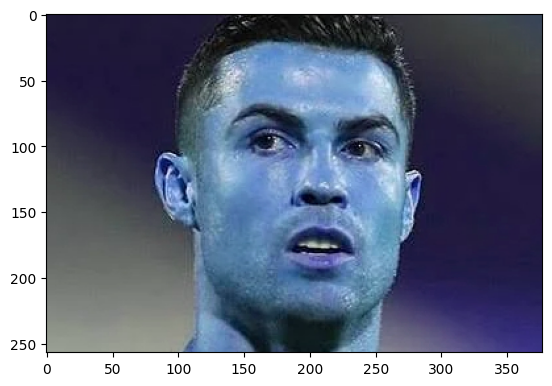

In [14]:
plt.imshow(img)

In [15]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

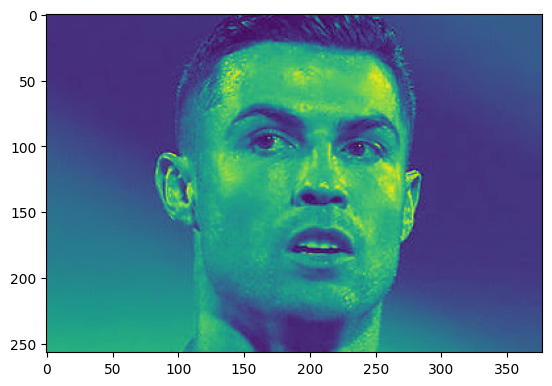

In [16]:
plt.imshow(gray)

In [17]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eyes_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
faces=face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[110,  23, 199, 199]], dtype=int32)

In [18]:
(x,y,w,h)=faces[0] 
x,y,w,h

(np.int32(110), np.int32(23), np.int32(199), np.int32(199))

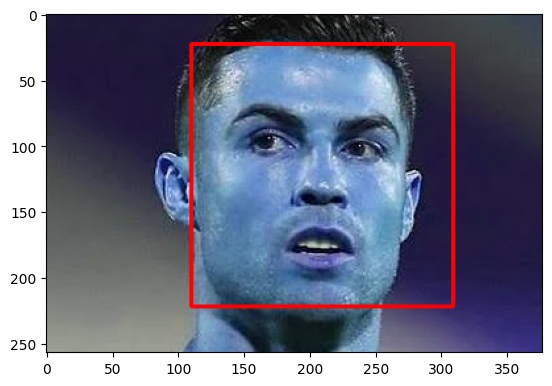

In [21]:
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

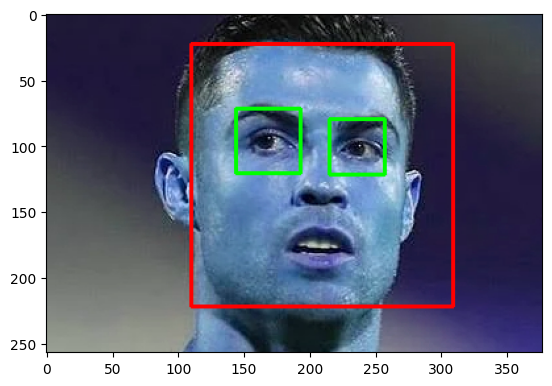

In [22]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray=gray[y:y+h,x:x+w]
    roi_color=face_img[y:y+h,x:x+w]
    eyes=eyes_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
plt.imshow(face_img,cmap='gray')

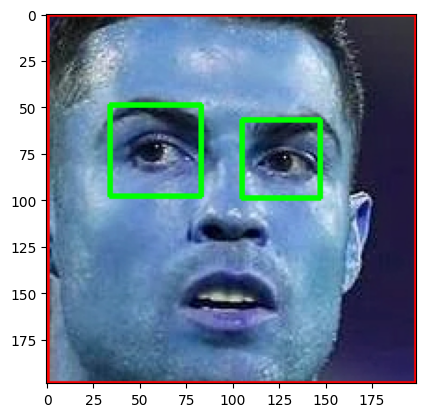

In [23]:
plt.imshow(roi_color)

In [31]:
def cropImg_if2_eye(img_path):
    img=cv2.imread(img_path)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
    faces=face_cascade.detectMultiScale(gray,1.3,5) 
    for (x,y,w,h) in faces:
        roi_gray=gray[y:y+h,x:x+w]
        roi_color=img[y:y+h,x:x+w]
        eyes=eyes_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

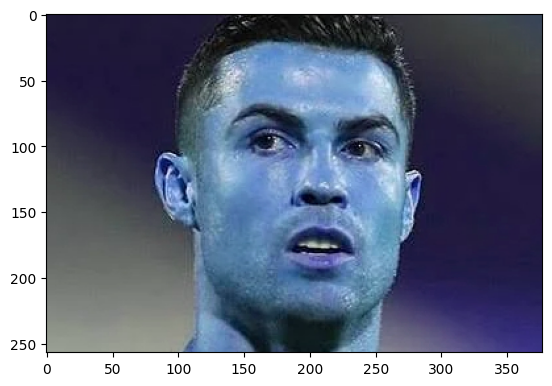

In [32]:
oImg=cv2.imread('D:/sport_Person_Classifier_model/test/Cristiano Ronaldo - Wikiquote.jpg')
plt.imshow(oImg)

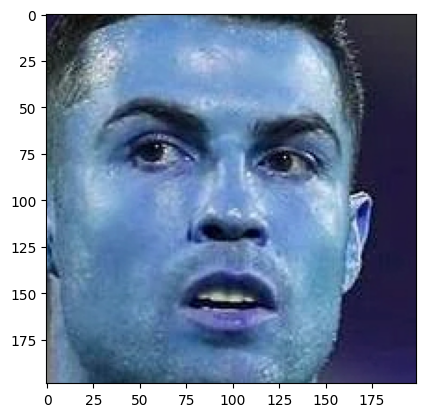

In [33]:
cropped_img=cropImg_if2_eye('D:/sport_Person_Classifier_model/test/Cristiano Ronaldo - Wikiquote.jpg') 
plt.imshow(cropped_img)

In [ ]:
cropped_img_dirs=[] 

celebrity_file_name_Dict={} 

for img_dir in img_dirs:

    count=1

    celebrity_name=img_dir.split('/')[-1]

    celebrity_file_name_Dict[celebrity_name]=[]

    # print(celebrity_name)



    for entry in os.scandir(img_dir):

        roi_color=cropImg_if2_eye(entry.path)

        if roi_color is not None:

            cropped_folder=path_to_cr_data+celebrity_name

            if not os.path.exists(cropped_folder):

                os.makedirs(cropped_folder)

                cropped_img_dirs.append(cropped_folder)

                # print(cropped_folder) 

            print("Generating cropped images in folder: ", cropped_folder)

                

            cropped_file_name = str(count) + ".jpg"

            cropped_file_path = cropped_folder + "/" + cropped_file_name

            

            cv2.imwrite(cropped_file_path, roi_color)

            celebrity_file_name_Dict[celebrity_name].append(cropped_file_path)

            count+=1